In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import scipy.cluster.hierarchy as hr
from geojson import LineString

In [3]:
a=[]
with open('C:/Users/찬란한 돌멩이/Desktop/GPS DAT/Test DAT/GPS.txt', 'r') as f:
    lines = f.readlines()
    for i in lines:
        b= i.split(sep=',')
        b[6]=b[6].replace("\n","")
        b[6]=b[6].replace(":","")
        a.append(b)

#Pre-processing(위도, 경도, 시간 값만 추출)
n_a = np.array(a)
for i in range(4):
    n_a = np.delete(n_a,2,axis=1)
n_a = n_a.astype(np.float64)

In [4]:
#Pre-processing(위도, 경도, 시간 값만 추출)
n_a = np.array(a)
for i in range(4):
    n_a = np.delete(n_a,2,axis=1)
n_a = n_a.astype(np.float64)
GPS_info_list1 = n_a.tolist()


In [5]:
#DTW 분석을 위한 Dummy 생성
N = len(GPS_info_list1)//100+1
for i in range(N):
    if i*100+100 > len(GPS_info_list1):
        globals()['GPS_dummy_'+str(i)] = GPS_info_list1[i*100:len(GPS_info_list1)+1]
    else:
        globals()['GPS_dummy_'+str(i)] = GPS_info_list1[i*100:i*100+100]


distance_matrix_dtw=np.zeros(shape=(N,N))
path_list=[]


In [ ]:
for i in range(len(GPS_info_list1)//100):
    for j in range(i+1, len(GPS_info_list1)//100+1):
        distance, path = fastdtw(globals()['GPS_dummy_'+str(i)],globals()['GPS_dummy_'+str(j)] , dist=euclidean)
        distance_matrix_dtw[i][j] = distance
        path_list.append(path) 
#distance_matrix_dtw = distance_matrix_dtw.tolist()
print(distance_matrix_dtw)


(57, 4)


C:\Users\찬란한 돌멩이\AppData\Local\Temp\ipykernel_15204\404797102.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


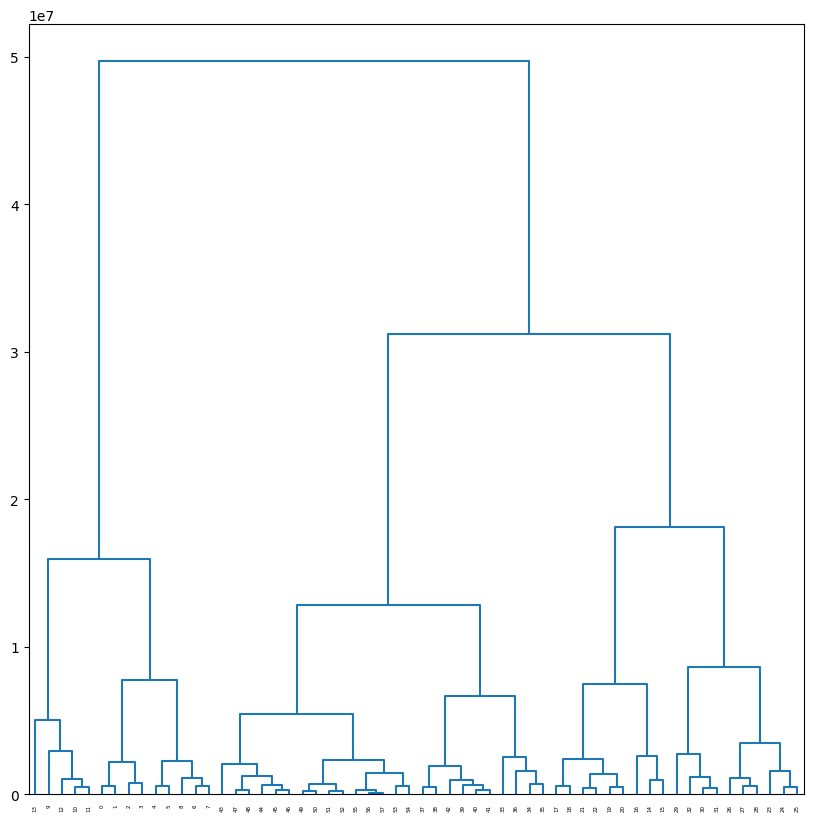

In [68]:
Z = hr.linkage(distance_matrix_dtw,method='complete')
print(Z.shape)

fig = plt.figure(figsize= (10,10))
T= hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=4 )
fig.show()

In [ ]:
S=[]
for i in GPS_dummy_37:
    S.append(str(i[1])+" "+str(i[0])+" ")
S = ','.join(S)
S = 'LineString'+" "+"("+S+")"


In [11]:
import folium
from shapely import wkt, geometry
import json
from pprint import pprint

from openrouteservice import client, places

api_key = '5b3ce3597851110001cf62487a4f3ad33ea14791b72150c9e6446e5e'

clnt = client.Client(key=api_key)

In [63]:


wkt_str = S
aoi_geom = wkt.loads(wkt_str)

aoi_coords = list(aoi_geom.coords)
aoi_coords = [(y,x) for x,y in aoi_coords] 
aoi_centroid = aoi_geom.centroid 


m = folium.Map(location=(aoi_centroid.y, aoi_centroid.x), zoom_start=16)
folium.vector_layers.Polygon(aoi_coords,
                                     color='#00d699',
                                     fill_color='#77d699',
                                    fill_opacity=0.2,
                                     weight=3).add_to(m)

m